In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

In [3]:
path = '../data/womens_clothing_ecommerce_reviews_balanced.csv'

df = pd.read_csv(path, delimiter=',')
df.head()

,sentiment,review_body,product_category
0,-1,The cut of this piece is great the quality of...,Blouses
1,-1,Material is so thin this shirt ripped in three...,Blouses
2,-1,This top is too short so much so that tucking...,Blouses
3,-1,This top was gorgeous and fit perfectly right ...,Blouses
4,-1,After reading the reviews i sized down to a 6....,Blouses


In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/hacene/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
sentence = "I'm not a fan of this product!"

tokens = nltk.word_tokenize(sentence)
print(tokens)

['I', "'m", 'not', 'a', 'fan', 'of', 'this', 'product', '!']


In [7]:
def tokenize(review):
    # delete commas and quotation marks, apply tokenization and join back into a string separating by spaces
    return ' '.join([
        str(token) 
        for token in nltk.word_tokenize(str(review).replace(',', '').replace('"', '').lower())
    ])
    
def prepare_data(df):
    #df['sentiment'] = df['sentiment'].map(lambda sentiment : '__label__{}'.format(str(sentiment).replace('__label__', '')))
    df["review_body"] = df["review_body"].map(lambda review : tokenize(review)) # Replace all None
    return df

In [8]:
# create a sample dataframe
df_example = pd.DataFrame({
    'sentiment':[-1, 0, 1], 
    'review_body':[
        "I do like this product!", 
        "this product is ok", 
        "I don't like this product!"]
})

# test the prepare_data function
print(prepare_data(df_example))

   sentiment                   review_body
0         -1      i do like this product !
1          0            this product is ok
2          1  i do n't like this product !


In [9]:
df_prepared = df[['sentiment', 'review_body']].reset_index(drop=True)
df_prepared = prepare_data(df_prepared)
df_prepared.head()

,sentiment,review_body
0,-1,the cut of this piece is great the quality of ...
1,-1,material is so thin this shirt ripped in three...
2,-1,this top is too short so much so that tucking ...
3,-1,this top was gorgeous and fit perfectly right ...
4,-1,after reading the reviews i sized down to a 6....


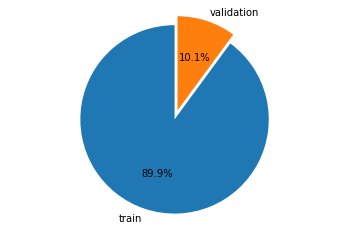

In [11]:
from sklearn.model_selection import train_test_split

# Split all data into 90% train and 10% holdout
df_train, df_validation = train_test_split(df_prepared, 
                                           test_size=0.10,
                                           stratify=df_prepared['sentiment'])

labels = ['train', 'validation']
sizes = [len(df_train.index), len(df_validation.index)]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.show()

In [12]:
train_path = '../data/train.csv'
df_train[['sentiment', 'review_body']].to_csv(train_path, index=False, header=False, sep=' ')

In [14]:
validation_path = '../data/validation.csv'
df_validation[['sentiment', 'review_body']].to_csv(validation_path, index=False, header=False, sep=' ')